# <span style="color: rgb(138, 92, 245);">I. Encuesta en Aerolíneas</span>

## <span style="color: rgb(138, 92, 245);">1. Introducción</span>

Comenzamos por importar los datos referentes a este ejercicio. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Tema oscuro por defecto
px.defaults.template = "plotly_dark"

In [2]:
df_1 = pd.read_csv('data/data_practica_encuesta.csv')

In [3]:
df_1.head()

,Id,Servicio wifi a bordo,Hora de salida/llegada conveniente,Facilidad de reserva en línea,Ubicación de la puerta,Alimentos y bebidas,Embarque en línea,Comodidad del asiento,Entretenimiento a bordo,Servicio a bordo,Servicio de sala de piernas,Manejo de equipaje,Servicio de facturación,Limpieza
0,19556,5,4,3,4,3,4,3,5,5,5,5,2,5
1,90035,1,1,3,1,5,4,5,4,4,4,4,3,5
2,12360,2,0,2,4,2,2,2,2,4,1,3,2,2
3,77959,0,0,0,2,3,4,4,1,1,1,1,3,4
4,36875,2,3,4,3,4,1,2,2,2,2,2,4,4


In [4]:
df_1.shape

(25976, 14)

El presente ejercicio tiene como objetivo analizar la opinión de los usuarios de una aerolínea sobre diversos aspectos del servicio. A partir de los datos proporcionados, se evaluará la calidad de los datos, se realizará un análisis exploratorio y se aplicará un Análisis Factorial para reducir la dimensionalidad y obtener componentes latentes que representen los factores subyacentes en la percepción de los usuarios.

## <span style="color: rgb(138, 92, 245);">2. Calidad de los datos</span>

**Objetivo**: validar si los datos son consistentes, completos y adecuados para el análisis.
Incluye:

* Verificación de valores nulos o atípicos.

* Revisión de tipos de datos.

* Identificación de valores extremos o inconsistentes.

 * Decisiones de limpieza o imputación.

In [5]:
# Funcion Para Imprimir Porcetanje de Valores Nulos y Tipos de Datos
def print_data_info(df):
    print("Información del DataFrame:")
    print(df.info())
    print("\n Porcentaje de Valores nulos por columna:")
    print(df.isnull().mean() * 100)
    print("\n Cantidad de Valores Únicos por columna:")
    for column in df.columns:
        unique_count = df[column].value_counts()
        print(f"{column}: {unique_count} valores únicos")

En este caso, excluimos la variable de `id` pues esto facilitará todas las tareas que requerimos completar antes del análisis factorial. 

In [6]:
# Excluimmos la primera columna que es un ID
df_1_original = df_1.copy()
df_1 = df_1.iloc[:,1:]

In [7]:
# Imprimir Información del DataFrame y Porcentaje de Valores Nulos (Excluyendo la primera columna)
print_data_info(df_1)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Servicio wifi a bordo               25976 non-null  int64
 1   Hora de salida/llegada conveniente  25976 non-null  int64
 2   Facilidad de reserva en línea       25976 non-null  int64
 3   Ubicación de la puerta              25976 non-null  int64
 4   Alimentos y bebidas                 25976 non-null  int64
 5   Embarque en línea                   25976 non-null  int64
 6   Comodidad del asiento               25976 non-null  int64
 7   Entretenimiento a bordo             25976 non-null  int64
 8   Servicio a bordo                    25976 non-null  int64
 9   Servicio de sala de piernas         25976 non-null  int64
 10  Manejo de equipaje                  25976 non-null  int64
 11  Servicio de facturación             2597

Los resultados anteriores nos indican que toda variable es numérica por lo que se consideraron aptas para el Análisis Factorial. Además, ninguna variable contiene valores nulos explícitamente. Tampoco se tienen variables ***dummy***, pues ninguna es de tipo binaria (tampoco unaria).

También podemos notar que todas las variables toman valores enteros del 1 al 5, es decir, existen 5 tipos de calificaciones distintas que pueden elegir los clientes, con 1 la más baja y 5 la más alta. En este caso, según nuestro diccionario, el valor cero indica que no se proporcionó calificación. Por lo cuál, el valor cero represtaria un valor nulo en este caso. Procedemos a revisar la cantidad de ceros en las variables, luego, si su porcentaje de ceros es menor al 10% los transformamos a valores `np.nan` y con ello, podremos imputar los valores nulos. 

In [8]:
# Función para contar ceros en el DataFrame
def zeros_percentage(df):
    for column in df.columns:
        zero_count = (df[column] == 0).sum()
        total_count = len(df[column])
        zero_percentage = (zero_count / total_count) * 100
        print(f"Columna '{column}': {zero_count} ceros ({zero_percentage:.2f}%)")   

# Función para reemplazar ceros con NaN
def fill_zero_with_nan(df):
    df_replaced = df.replace(0, np.nan)
    return df_replaced

In [9]:
# Mostrar estadisticas descriptivas (como la media) antes de imputar
df_1.describe()

,Servicio wifi a bordo,Hora de salida/llegada conveniente,Facilidad de reserva en línea,Ubicación de la puerta,Alimentos y bebidas,Embarque en línea,Comodidad del asiento,Entretenimiento a bordo,Servicio a bordo,Servicio de sala de piernas,Manejo de equipaje,Servicio de facturación,Limpieza
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000
mean,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.286226
std,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.319330
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
# Revisar porcentaje de ceros en el DataFrame
zeros_percentage(df_1)

Columna 'Servicio wifi a bordo': 813 ceros (3.13%)
Columna 'Hora de salida/llegada conveniente': 1381 ceros (5.32%)
Columna 'Facilidad de reserva en línea': 1195 ceros (4.60%)
Columna 'Ubicación de la puerta': 0 ceros (0.00%)
Columna 'Alimentos y bebidas': 25 ceros (0.10%)
Columna 'Embarque en línea': 652 ceros (2.51%)
Columna 'Comodidad del asiento': 0 ceros (0.00%)
Columna 'Entretenimiento a bordo': 4 ceros (0.02%)
Columna 'Servicio a bordo': 2 ceros (0.01%)
Columna 'Servicio de sala de piernas': 126 ceros (0.49%)
Columna 'Manejo de equipaje': 0 ceros (0.00%)
Columna 'Servicio de facturación': 0 ceros (0.00%)
Columna 'Limpieza': 2 ceros (0.01%)


Dado que el porcentaje de ceros en todas las columnas es menor al 10%, podemos remplazarlos por valores nulos e imputarlos por la moda, pues necesitamos que los valores imputados sean también valores enteros. 

In [11]:
# Reemplazar ceros con NaN
df_1 = fill_zero_with_nan(df_1)

In [12]:
from sklearn.impute import SimpleImputer

# Función para imputar valores nulos con la moda
def impute_missing_with_mode(df):
    # Definir el imputador para la moda
    imputer = SimpleImputer(strategy='most_frequent')
    for column in df.columns:
        df[column] = imputer.fit_transform(df[[column]]).astype(int)

    return df

In [13]:
# Imputar valores nulos con la moda
df_1 = impute_missing_with_mode(df_1)

In [14]:
print_data_info(df_1)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Servicio wifi a bordo               25976 non-null  int64
 1   Hora de salida/llegada conveniente  25976 non-null  int64
 2   Facilidad de reserva en línea       25976 non-null  int64
 3   Ubicación de la puerta              25976 non-null  int64
 4   Alimentos y bebidas                 25976 non-null  int64
 5   Embarque en línea                   25976 non-null  int64
 6   Comodidad del asiento               25976 non-null  int64
 7   Entretenimiento a bordo             25976 non-null  int64
 8   Servicio a bordo                    25976 non-null  int64
 9   Servicio de sala de piernas         25976 non-null  int64
 10  Manejo de equipaje                  25976 non-null  int64
 11  Servicio de facturación             2597

Otro punto importante que debemos revisar es verificar que existen correlaciones entre las variables que tenemos. Más adelante haremos una prueba formal de que estas correlaciones, en efecto existen. 

In [15]:
# Heatmap de correlación
corr = df_1.corr()

fig_corr = px.imshow(corr, text_auto=True, aspect="auto",
                     title="Matriz de Correlación (numéricas)",
                     color_continuous_scale="Purp")
fig_corr.show()

Es claro que distintas variables presentan correlaciones positivas entre ellas. Por otro lado, revisamos con el metodo de Z-Score si existen valores extremos que necesitemos tratar. 

In [16]:
from scipy import stats

# --- Calcular Z-score ---
z_scores = np.abs(stats.zscore(df_1))

# --- Identificar filas con algún valor extremo ---
outliers_z = (z_scores > 3)   # umbral clásico
outlier_rows = df_1[outliers_z.any(axis=1)]

print(f"Filas con valores extremos detectadas: {len(outlier_rows)}")

Filas con valores extremos detectadas: 0


En este caso, no se detectan valores extremos o atípicos que representen un problema para nuestro Análisis Factorial. 

Podemos además fijarnos en las puntuaciones más bajas y altas por cada variable con un gráfico de barras acumulado. 

In [17]:
import pandas as pd
import plotly.express as px

# --- 1️⃣ Reestructurar el DataFrame ---
# (Asegúrate de excluir cualquier columna que no sea numérica de puntuaciones)
df_long = df_1.melt(var_name='Variable', value_name='Puntuación')

# --- 2️⃣ Calcular frecuencias y proporciones ---
freq_table = (
    df_long
    .groupby(['Variable', 'Puntuación'])
    .size()
    .reset_index(name='Frecuencia')
)

# Usamos transform para conservar el índice
freq_table['Proporción'] = freq_table.groupby('Variable')['Frecuencia'].transform(lambda x: x / x.sum())

# --- 3️⃣ Crear el gráfico acumulado ---
fig = px.bar(
    freq_table,
    x='Variable',
    y='Proporción',
    color='Puntuación',
    title="Distribución acumulada de puntuaciones por variable",
    template='plotly_dark',
    color_continuous_scale='Viridis'
)

# --- 4️⃣ Personalizar ---
fig.update_layout(
    barmode='stack',
    xaxis_title="Variable",
    yaxis_title="Proporción acumulada",
    hovermode='x unified',
    title_x=0.5
)

fig.update_traces(marker=dict(line=dict(width=0)))

fig.show()


## <span style="color: rgb(138, 92, 245);">3. Escalamiento</span>

Sabemos que, para el Análisis Factorial, necesitaremos hacer posteriormente dos tipos de pruebas: 
* Prueba de Esfericidad de Bartlett
* Prueba KMO

Ambas pruebas se basan en la matriz de correlación que graficamos anteriormente. Por ello, aunque las variables no tengan escalas tan distintas, es recomendable hacer un escalamiento de datos estandar (media $\mu=0$ y desviación estandar $\sigma=1$)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler =  StandardScaler()
columns=df_1.columns
df_1 = scaler.fit_transform(df_1)
df_1 = pd.DataFrame(data=df_1,columns=columns)
df_1.head(10)

,Servicio wifi a bordo,Hora de salida/llegada conveniente,Facilidad de reserva en línea,Ubicación de la puerta,Alimentos y bebidas,Embarque en línea,Comodidad del asiento,Entretenimiento a bordo,Servicio a bordo,Servicio de sala de piernas,Manejo de equipaje,Servicio de facturación,Limpieza
0,1.769652,0.542883,0.117204,0.797831,-0.165067,0.508483,-0.340303,1.227251,1.259257,1.255453,1.161716,-1.035348,1.299060
1,-1.429490,-1.656419,0.117204,-1.542065,1.341006,0.508483,1.174774,0.479671,0.479062,0.485439,0.311739,-0.247517,1.299060
2,-0.629705,0.542883,-0.657870,0.797831,-0.918104,-1.085670,-1.097842,-1.015491,0.479062,-1.824605,-0.538238,-1.035348,-0.975382
3,-0.629705,0.542883,-0.657870,-0.762100,-0.165067,0.508483,0.417235,-1.763071,-1.861523,-1.824605,-2.238193,-0.247517,0.540913
4,-0.629705,-0.190218,0.892278,0.017866,0.587969,-1.882746,-1.097842,-1.015491,-1.081328,-1.054590,-1.388216,0.540315,0.540913
5,0.170081,-0.190218,0.117204,0.017866,1.341006,1.305559,-0.340303,1.227251,0.479062,-0.284576,-2.238193,-1.823179,1.299060
6,1.769652,1.275983,1.667352,1.577797,-0.165067,1.305559,1.174774,1.227251,1.259257,1.255453,1.161716,0.540315,-0.217235
7,-0.629705,-0.923318,-0.657870,-0.762100,0.587969,0.508483,1.174774,0.479671,0.479062,0.485439,0.311739,1.328146,-0.217235
8,1.769652,-0.923318,-0.657870,-0.762100,1.341006,1.305559,1.174774,1.227251,-1.081328,-1.054590,1.161716,-0.247517,1.299060
9,-0.629705,-0.923318,-0.657870,-0.762100,-0.165067,0.508483,0.417235,0.479671,0.479062,0.485439,0.311739,1.328146,0.540913


## <span style="color: rgb(138, 92, 245);">4. Prueba de Esfericidad de Bartlett</span>

La siguiente prueba propone como hipótesis nula que la matriz de correlación sea igual a la matriz identidad de su dimensión correspondiente. El proposito es rechazar la hipótesis nula con un nivel de siginificancia $\alpha=0.05$, pues esto nos diría que sí existen correlaciones entre nuestras variables. 

$$H_0: C_{n\times n}=\text{Id}_n\,\hspace{5mm}\text{vs}\hspace{5mm} H_1: C_{n\times n}\neq\text{Id}_n $$
donde $c_{ij}=\text{Corr}(X_i,X_j)=\frac{\text{Cov}(X_i,X_j)}{\sigma_{X_i}\sigma_{X_j}}$ para toda $i,j\in\{1,2,\dots,n\}$.

In [20]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [21]:
# Prueba de Esfericidad de Bartlett
chi2,p = calculate_bartlett_sphericity(df_1)
print("Esfericidad de Bartlett")
print("Valor de Chi : ",chi2)
print("P - value : ",p)

Esfericidad de Bartlett
Valor de Chi :  133504.84001600655
P - value :  0.0


Dado que $p-\text{value}=0.0<0.05=\alpha$, entonces rechazamos la hipótesis nula, es decir, existen variables correlacionadas con un 95% de confianza. 

## <span style="color: rgb(138, 92, 245);">5. Prueba KMO</span>

Esta prueba nos permite comprobar que existe varianza común entre variables y que cada variable puede predecirse por las demás variables dentro del dataset. En este caso, se considera que un $KMO<0.6$ sería inadecuado para el Análisis Factorial, pues indicaría que la proporción de varianza en general es de menos del 60%. 

In [22]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [23]:
# Prueba KMO
kmo_all,kmo_model = calculate_kmo(df_1)
print("KMO Test Statisitc",kmo_model)

KMO Test Statisitc 0.7624124186131424


In [24]:
kmo_all

array([0.74558039, 0.734667  , 0.70489763, 0.72060627, 0.83744217,
       0.73320624, 0.8321386 , 0.74327996, 0.71314235, 0.82656594,
       0.72706304, 0.66170088, 0.81927677])

Se obtuvo una proporción general de varianza del 76%, lo cuál nos indica que tiene sentido proceder a reducir dimensiones con el Análisis Factorial. 

## <span style="color: rgb(138, 92, 245);">6. Número de Factores</span>

Dado que ya se ha eliminado la columna *Id* de nuestro análisis, tomamos todas las variables restantes y procedemos a obtener los factores más significativos, es decir, aquellos con mayor información respcto a la varianza común entre variables.

In [25]:
from factor_analyzer import FactorAnalyzer

In [26]:
fa = FactorAnalyzer(rotation = None)

In [27]:
fa.fit(df_1)

c:\Users\Aura De La Garza G\Projects\CienciaDeDatos_M3\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



,n_factors,3
,rotation,None
,method,'minres'
,use_smc,True
,is_corr_matrix,False
,bounds,"(0.005, ...)"
,impute,'median'
,svd_method,'randomized'
,rotation_kwargs,{}


Para poder obtener los factores más sifgnificativos, necesitamos calcular los eigenvalores de la matriz de correlación. Aquellos eigenvalores que sean mayores a 1, serán los más aptos para el análisis. Esto es porque, al escalar nuestros datos, su varianza (medida por sus eigenvalores) al ser mayor que 1, nos indica que es una variable que explica más varianza que una sola variable observada. 

In [28]:
ev,_ = fa.get_eigenvalues()
# Mostrar eigenvalores
print("Eigenvalores:", np.round(ev, 3))

Eigenvalores: [3.592 2.438 1.794 1.038 0.934 0.668 0.503 0.482 0.453 0.334 0.291 0.28
 0.192]


Creamos una gráfica interactiva que nos permita ver tanto el valor del eigenvalor del factor como su porcentaje de varianza explicada (Llamado Gráfico de Scree). 

In [29]:
import plotly.graph_objects as go
import pandas as pd

# Calcular porcentaje de varianza explicada
var_exp = [(i / sum(ev)) * 100 for i in ev]

# Crear DataFrame
df_ev = pd.DataFrame({
    'Factor': range(1, len(ev)+1),
    'Eigenvalor': ev,
    'VarianzaExplicada(%)': var_exp
})

# Crear figura base
fig = go.Figure()

# Añadir puntos y línea punteada azul pastel
fig.add_trace(go.Scatter(
    x=df_ev['Factor'],
    y=df_ev['Eigenvalor'],
    mode='lines+markers+text',
    text=[f"λ={v:.2f}<br>{p:.1f}%" for v, p in zip(df_ev['Eigenvalor'], df_ev['VarianzaExplicada(%)'])],
    textposition='top center',
    line=dict(color='#89CFF0', width=2, dash='dot'),
    marker=dict(color='#89CFF0', size=8),
    name='Eigenvalores',
    hovertemplate="<b>Factor %{x}</b><br>Eigenvalor: %{y:.2f}<br>Varianza explicada: %{customdata:.1f}%<extra></extra>",
    customdata=df_ev['VarianzaExplicada(%)']
))

# Personalizar estilo del hover (fondo negro, texto blanco)
fig.update_traces(
    hoverlabel=dict(
        bgcolor='black', 
        font_size=13,
        font_color='white'
    )
)

# Añadir línea horizontal del criterio de Kaiser
fig.add_hline(
    y=1,
    line_dash="dash",
    line_color="gray",
    annotation_text="Eigenvalor = 1 (criterio de Kaiser)",
    annotation_position="bottom right",
    annotation_font_color="gray"
)

# Configurar layout general
fig.update_layout(
    template='plotly_dark',
    title='Gráfico de Scree (Eigenvalores y Varianza Explicada por Factor)',
    title_font=dict(size=22, color='white'),
    xaxis_title='Factores',
    yaxis_title='Eigenvalores',
    hovermode='x unified',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    width=1250,
    height=750,
)

# Cuadrícula gris suave
fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='gray')

# Mostrar
fig.show()

Notamos que los primeros cuatro factores estan por encima de 1. Por lo tanto, el número de factores que elegimos serán 4. 

## <span style="color: rgb(138, 92, 245);">7. Interpretación de Factores</span>

In [30]:
fa = FactorAnalyzer(n_factors=4,rotation=None)
fa.fit(df_1)

c:\Users\Aura De La Garza G\Projects\CienciaDeDatos_M3\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



,n_factors,4
,rotation,None
,method,'minres'
,use_smc,True
,is_corr_matrix,False
,bounds,"(0.005, ...)"
,impute,'median'
,svd_method,'randomized'
,rotation_kwargs,{}


In [31]:
fa = FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(df_1)

c:\Users\Aura De La Garza G\Projects\CienciaDeDatos_M3\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



,n_factors,4
,rotation,'varimax'
,method,'minres'
,use_smc,True
,is_corr_matrix,False
,bounds,"(0.005, ...)"
,impute,'median'
,svd_method,'randomized'
,rotation_kwargs,{}


In [32]:
pd.DataFrame(fa.get_eigenvalues()[0],columns=['EigenValues'])

,EigenValues
0,3.591788
1,2.438426
2,1.794445
3,1.038265
4,0.933908
5,0.667518
6,0.502751
7,0.482149
8,0.453045
9,0.334337


## <span style="color: rgb(138, 92, 245);">8. Cargas</span>

In [33]:
import seaborn as sns
cm = sns.light_palette("blue", as_cmap=True)

In [34]:
fa.loadings_

array([[ 0.11030726,  0.64617799,  0.1354356 ,  0.36993264],
       [-0.04127085,  0.61941502,  0.0492302 , -0.0306301 ],
       [-0.02214046,  0.8169483 ,  0.02359169,  0.29975442],
       [ 0.01491591,  0.69534145, -0.05429057, -0.14332475],
       [ 0.77751112,  0.01868742, -0.00360688,  0.04291785],
       [ 0.27397035,  0.14626108,  0.1409472 ,  0.80284405],
       [ 0.75022034, -0.01829127,  0.0826572 ,  0.2354729 ],
       [ 0.78298106,  0.03129913,  0.46180855,  0.0070922 ],
       [ 0.07283772,  0.0199196 ,  0.72854787,  0.03628884],
       [ 0.06253361,  0.04363083,  0.50257134,  0.06038175],
       [ 0.04817686,  0.04148012,  0.73558996, -0.03422526],
       [ 0.0901516 , -0.01421404,  0.29055015,  0.17376996],
       [ 0.84696326, -0.0053772 ,  0.08598628,  0.11900872]])

In [35]:
cargas=pd.DataFrame(fa.loadings_,index=df_1.columns).style.background_gradient(cmap=cm)

cargas

,0,1,2,3
Servicio wifi a bordo,0.110307,0.646178,0.135436,0.369933
Hora de salida/llegada conveniente,-0.041271,0.619415,0.049230,-0.030630
Facilidad de reserva en línea,-0.022140,0.816948,0.023592,0.299754
Ubicación de la puerta,0.014916,0.695341,-0.054291,-0.143325
Alimentos y bebidas,0.777511,0.018687,-0.003607,0.042918
Embarque en línea,0.273970,0.146261,0.140947,0.802844
Comodidad del asiento,0.750220,-0.018291,0.082657,0.235473
Entretenimiento a bordo,0.782981,0.031299,0.461809,0.007092
Servicio a bordo,0.072838,0.019920,0.728548,0.036289
Servicio de sala de piernas,0.062534,0.043631,0.502571,0.060382


## <span style="color: rgb(138, 92, 245);">9. Diferencia</span>

In [36]:
fa.get_factor_variance()

(array([2.60706773, 1.97943293, 1.68051449, 1.00057463]),
 array([0.20054367, 0.15226407, 0.12927035, 0.07696728]),
 array([0.20054367, 0.35280774, 0.48207809, 0.55904537]))

In [37]:
diferencia=pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])

diferencia

,0,1,2,3
Variance,2.607068,1.979433,1.680514,1.000575
Proportional Var,0.200544,0.152264,0.129270,0.076967
Cumulative Var,0.200544,0.352808,0.482078,0.559045


## <span style="color: rgb(138, 92, 245);">10. Comunidades</span>

In [38]:
comunidades=pd.DataFrame(fa.get_uniquenesses(),index=df_1.columns,columns=['unicidad'])

comunidades

,unicidad
Servicio wifi a bordo,0.415093
Hora de salida/llegada conveniente,0.611260
Facilidad de reserva en línea,0.241696
Ubicación de la puerta,0.492788
Alimentos y bebidas,0.393272
Embarque en línea,0.239123
Comodidad del asiento,0.374555
Entretenimiento a bordo,0.172644
Servicio a bordo,0.462199
Servicio de sala de piernas,0.737962


# <span style="color: rgb(138, 92, 245);">II. FNA para Diagnóstico de Cáncer de Mama</span>

## <span style="color: rgb(138, 92, 245);">1. Introducción</span>

En el siguiente ejercicio se revisará un dataset que contiene características que se detectan de imágenes de procedimientos FNA en el tejido mamario. Se utiliza una aguja muy delgada y se realiza para diagnosticar la causa de un crecimiento o masa, como un tumor benigno o canceroso. Este dataset describe caracter ısticas de los núcleos celulares presentes en la imagen.

In [39]:
df_2 = pd.read_csv('data/data_practica_cancer.csv')

In [40]:
df_2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
df_2.shape

(569, 32)

El objetivo de este ejercicio es utilizar distintas técnicas de reducción de dimensiones conservando aquellas características que preservan mejor la distinción entre diagnósticos benignos y malignos.  

## <span style="color: rgb(138, 92, 245);">2. Calidad de los datos</span>

Comenzamos por revisar la calidad inicial de los datos. Observamos que no se presentan valores ausentes en ninguna variable. Además, podemos exclir las variables de `id` y `diagnosis` (esta última es una variable *dummy*) pues en este caso, se facilita la visualización, interpretación y tratamiento de variables. En este caso todas las variables restantes se consideran continuas.

In [42]:
# Imprimir Información del DataFrame y Porcentaje de Valores Nulos
print_data_info(df_2)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14 

In [43]:
# Excluir las columnas 'id' y 'diagnosis'
df_2_original = df_2.copy()
df_2 = df_2.drop(columns=['id','diagnosis'])

In [44]:
# Mostrar estadisticas descriptivas
df_2.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Revisamos si el dataset contiene valores extremos utilizando Z-Score. 

In [45]:
# Revisar outliers
z_scores = np.abs((df_2 - df_2.mean()) / df_2.std())
outliers_global = (z_scores > 3).any(axis=1)  # puntos fuera de 3 desviaciones
print(f"Outliers globales detectados: {outliers_global.sum()} de {len(df_2)}")
print(f"Porcentaje de outliers globales: {(outliers_global.sum() / len(df_2)) * 100:.2f}%")

Outliers globales detectados: 74 de 569
Porcentaje de outliers globales: 13.01%


Otra cosa que podemos comparar para entender un poco mejor nuestros datos es comparar la distribución del radio medio por tumor. En este caso, dividimos las distribuciones de acuerdo a los tumores malignos y los beningnos. Observamos como se diferencian estos dos tipos. 

In [46]:
import plotly.express as px

fig = px.box(df_2_original, 
             x='diagnosis', 
             y='radius_mean', 
             color='diagnosis',
             template='plotly_dark',
             title='Distribución del Radio Medio por Tipo de Tumor')
fig.show()

Otra cosa que podemos explorar en nuestros datos es un heatmap de correlaciones. Con ello, podremos ver que variables influyen mas entre sí. 

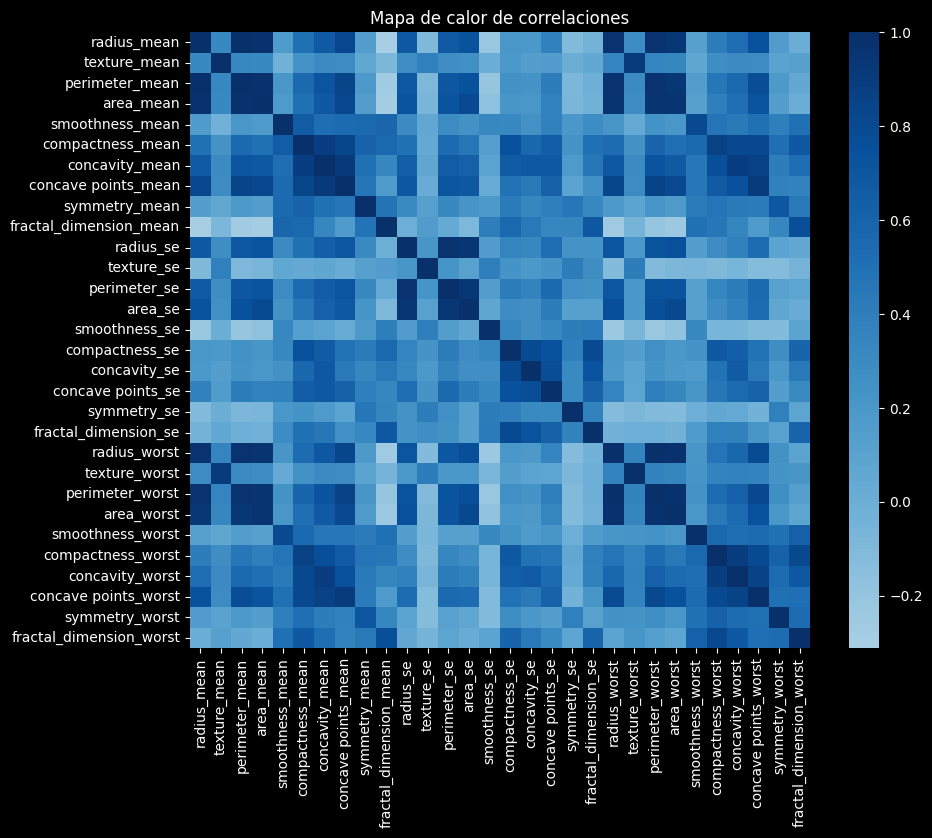

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.style.use('dark_background')
sns.heatmap(df_2.corr(), cmap='Blues', center=0)
plt.title('Mapa de calor de correlaciones')
plt.show()

Dado que existe un 13% de valores extremos, en vez de eliminarlos, utilizamos ***Robust Scaler*** el cuál ajusta las características utilizando estadísticas robustas ante valores atípicos.

Este escalador elimina la mediana y ajusta los datos según el rango intercuartil el cual es el intervalo entre el primer cuartil (percentil 25) y el tercer cuartil (percentil 75). En este caso, no eliminaremos valores extremos y nos quedaremos con este escalamiento, pues existen ciertas mediciones de tumores que por sí mismas poseen valores extremos pero que eliminarlas nos dificultaría entenderlas. 

In [48]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
columns=df_2.columns
df_2 = robust_scaler.fit_transform(df_2)
df_2 = pd.DataFrame(data=df_2,columns=columns)
df_2.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,2.039192,...,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
1,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,-0.578385,...,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
2,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,-0.184086,...,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
3,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,4.263658,...,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
4,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,-0.321853,...,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099
5,-0.225490,-0.557726,-0.126858,-0.204194,1.686741,1.181582,0.951750,0.882660,0.872781,1.732779,...,0.086505,-0.192130,0.139017,0.096888,1.625850,1.631058,1.150522,0.768840,1.722963,2.151309
6,1.196078,0.202487,1.153128,1.349062,-0.065504,0.250000,0.505833,0.754330,0.005917,-0.489311,...,1.368512,0.260417,1.345120,1.616845,0.438776,0.238145,0.565201,0.966829,0.357037,0.176528
7,0.083333,0.353464,0.136882,0.073951,1.216587,1.097587,0.317580,0.490780,1.195266,1.540380,...,0.361592,0.315972,0.313393,0.370142,1.159864,0.814487,0.153130,0.577071,0.554074,1.700291
8,-0.090686,0.529307,0.043553,-0.086369,1.660328,1.535889,1.229583,1.118085,1.650888,1.466746,...,0.089965,0.615741,0.206830,0.092843,1.326531,1.710266,1.163562,1.099513,2.305185,1.317168
9,-0.223039,0.923623,-0.078465,-0.207506,1.200740,2.244502,1.638916,0.967219,0.704142,2.480998,...,0.020761,1.767361,-0.000242,0.043784,1.836735,4.409067,3.272355,1.255002,2.287407,6.181377


In [49]:
df_2.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.185611,0.079867,0.198031,0.286394,0.025900,0.178848,0.269521,0.287188,0.058043,0.149360,...,0.224773,0.030929,0.232531,0.341275,0.036347,0.220766,0.169480,0.152133,0.116675,0.189419
std,0.863737,0.763950,0.839923,0.971065,0.742954,0.806548,0.788212,0.722720,0.811073,0.838523,...,0.836201,0.711372,0.813818,1.001155,0.776613,0.819888,0.777289,0.681376,0.916555,0.875910
min,-1.565931,-1.621670,-1.467335,-1.124724,-2.284205,-1.118662,-0.608464,-0.623952,-2.165680,-1.375297,...,-1.217993,-1.549769,-1.144345,-0.881484,-2.045238,-0.962011,-0.844635,-1.035866,-1.862222,-1.212415
25%,-0.409314,-0.474245,-0.382648,-0.360927,-0.501849,-0.423183,-0.316195,-0.245670,-0.511834,-0.456057,...,-0.339100,-0.501157,-0.328167,-0.301037,-0.500000,-0.337155,-0.418033,-0.362807,-0.471111,-0.416101
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.590686,0.525755,0.617352,0.639073,0.498151,0.576817,0.683805,0.754330,0.488166,0.543943,...,0.660900,0.498843,0.671833,0.698963,0.500000,0.662845,0.581967,0.637193,0.528889,0.583899
max,3.612745,3.630551,3.534739,5.380519,3.567353,3.860263,3.611430,3.123487,3.692308,4.263658,...,3.645329,2.792824,3.718576,6.273079,3.105442,4.409067,3.820045,1.980616,5.653333,6.181377


Ahora que hemos escalado, podemos ver que las variables ya no están en rangos muy distintos entre ellas. Por lo tanto, procedemos a probar algunos métodos de reducción de dimensiones para facilitar la visualización en la tendencia de nuestros datos y que con ello se haga una mejor distinción entre diagnósticos benignos y malignos. 

## <span style="color: rgb(138, 92, 245);">3. PCA</span>

Comenzamos por probar el método de PCA. Este método nos permitirá generar nmuevas componentes a partir de combinaciones lineales de las variables originales, conservando la mayor varianza explicada posible. 

Probaremos tanto con 2 como 3 componentes. Esto nos permitirá comparar la diferencia entre varianza explicada que poseen ambas dimensionnes. 

In [50]:
import plotly.express as px
from sklearn.decomposition import PCA

# --- 1️⃣ PCA ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_2)

fig_pca = px.scatter(
    x=X_pca[:,0], y=X_pca[:,1],
    color=df_2_original['diagnosis'].map({'B':'Benigno', 'M':'Maligno'}),
    title=f"PCA — Varianza explicada total: {pca.explained_variance_ratio_.sum():.2%}",
    labels={"x":"PC1", "y":"PC2"},
    color_discrete_map={'Benigno':'#00CC96','Maligno':'#EF553B'},
    template="plotly_dark"
)
fig_pca.update_traces(marker=dict(size=6, opacity=0.8))
fig_pca.show()

In [51]:
import plotly.express as px
from sklearn.decomposition import PCA

# --- PCA con 3 componentes ---
pca3d = PCA(n_components=3, random_state=42)
X_pca3d = pca3d.fit_transform(df_2)

# Varianza explicada
varianza_total = pca3d.explained_variance_ratio_.sum() * 100
print(f"Varianza total explicada por 3 componentes: {varianza_total:.2f}%")

# --- Gráfico interactivo ---
fig_pca3d = px.scatter_3d(
    x=X_pca3d[:,0],
    y=X_pca3d[:,1],
    z=X_pca3d[:,2],
    color=df_2_original['diagnosis'],  # usamos la etiqueta mapeada
    title=f"PCA 3D — Varianza explicada total: {varianza_total:.2f}%",
    labels={
        "x": f"PC1 ({pca3d.explained_variance_ratio_[0]*100:.1f}%)",
        "y": f"PC2 ({pca3d.explained_variance_ratio_[1]*100:.1f}%)",
        "z": f"PC3 ({pca3d.explained_variance_ratio_[2]*100:.1f}%)",
    },
    color_discrete_map={'Benigno': '#00CC96', 'Maligno': '#EF553B'},
    template="plotly_dark"
)

fig_pca3d.update_traces(marker=dict(size=4, opacity=0.85))
fig_pca3d.update_layout(scene=dict(
    xaxis=dict(showbackground=False),
    yaxis=dict(showbackground=False),
    zaxis=dict(showbackground=False),
))
fig_pca3d.show()


Varianza total explicada por 3 componentes: 74.80%


Podemos ver que, en ambos casos, nos ayuda a diferenciar entre diagnósticos benignos y malignos, pues las áreas en las que se traslapan ambos grupos de puntos son mínimas y de un tamaño muy reducido. Podemos incluso ver como si una recta (para 2 componentes) o un plano (para 3 componentes) separara ambos grupos de punto, lo cuál es una buena señal al utilizar PCA. 

## <span style="color: rgb(138, 92, 245);">4. t-SNE</span>

In [52]:
import plotly.express as px
from sklearn.manifold import TSNE

# --- 2️⃣ t-SNE ---
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(df_2)

fig_tsne = px.scatter(
    x=X_tsne[:,0], y=X_tsne[:,1],
    color=df_2_original['diagnosis'].map({'B':'Benigno', 'M':'Maligno'}),
    title="t-SNE (perplexity=30)",
    labels={"x":"Dim 1", "y":"Dim 2"},
    color_discrete_map={'Benigno':'#00CC96','Maligno':'#EF553B'},
    template="plotly_dark"
)
fig_tsne.update_traces(marker=dict(size=6, opacity=0.8))
fig_tsne.show()

## <span style="color: rgb(138, 92, 245);">5. UMAP</span>

In [53]:
import plotly.express as px
import umap

# --- 3️⃣ UMAP ---
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(df_2)

fig_umap = px.scatter(
    x=X_umap[:,0], y=X_umap[:,1],
    color=df_2_original['diagnosis'].map({'B':'Benigno', 'M':'Maligno'}),
    title="UMAP (n_neighbors=15, min_dist=0.1)",
    labels={"x":"Dim 1", "y":"Dim 2"},
    color_discrete_map={'Benigno':'#00CC96','Maligno':'#EF553B'},
    template="plotly_dark"
)
fig_umap.update_traces(marker=dict(size=6, opacity=0.8))
fig_umap.show()


c:\Users\Aura De La Garza G\Projects\CienciaDeDatos_M3\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



# <span style="color: rgb(138, 92, 245);">III. Alfabeto en Lenguage de Señas</span>

## <span style="color: rgb(138, 92, 245);">1. Introducción</span>

Como último ejercicio, trabajaremos con un dataset que contiene imágenes (28x28 pixeles) del alfabeto en lenguaje de señas. Necesitamos un modelo no supervisado de reducción de dimensiones capaz de mantener alejadas aquellas imágenes donde los gestos de la mano son muy diferentes y mantienen cerca aquellas imágenes donde los gestos son similares. 

In [54]:
df_3 = pd.read_csv('data/data_practica_lenguaje_señas.csv')

In [55]:
df_3.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


Como primer paso, eliminamos la primer columna que representa la etiqueta correspondiente a cada letra del alfabeto. 

In [56]:
df_3_original = df_3.copy()
df_3 = df_3.drop(columns=['label'])

## <span style="color: rgb(138, 92, 245);">2. Calidad de los datos</span>

Por precaución, revisamos que este dataset no contenga valores nulos, pues representa la representación de varias imagenes en vectores con entradas enteras. 

In [57]:
def check_if_null_existence(df):
    null_exists = df.isnull().values.any()
    if null_exists:
        print("El DataFrame contiene valores nulos.")
    else:
        print("El DataFrame no contiene valores nulos.")

In [58]:
check_if_null_existence(df_3)

El DataFrame no contiene valores nulos.


In [59]:
df_3.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


Por otro lado, como es de esperarse, este dataset no tiene valores extremos, lo cual nos dice que no hubo error al procesar los pixeles de las imagenes. 

In [60]:
# Revisar outliers
z_scores = np.abs((df_3 - df_3.mean()) / df_2.std())
outliers_global = (z_scores > 3).any(axis=1)  # puntos fuera de 3 desviaciones
print(f"Outliers globales detectados: {outliers_global.sum()} de {len(df_3)}")
print(f"Porcentaje de outliers globales: {(outliers_global.sum() / len(df_3)) * 100:.2f}%")

Outliers globales detectados: 0 de 7172
Porcentaje de outliers globales: 0.00%


En este caso, para los dos modelos de reducción de dimensiónes que probaremos, necesitaremos escalar los datos. Utilizaremos el escalador estandar para que nuestros datos tengan media $\mu=0$ y desviación estandar $\sigma=1$.

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns=df_3.columns
df_3 = scaler.fit_transform(df_3)
df_3 = pd.DataFrame(data=df_3,columns=df_3_original.columns[1:])
df_3.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.033663,-0.034534,-0.082204,-0.143917,-0.216433,-0.271302,-0.311592,-0.380382,-0.432673,-0.473165,...,-0.008474,0.037778,-0.361108,-1.016447,-1.179420,-0.971810,-0.784522,-0.691958,-0.545613,-0.699714
1,-0.493980,-0.536147,-0.552037,-0.601326,-0.666800,-0.742367,-0.753457,-0.798408,-0.877519,-0.905806,...,-1.419389,-0.637816,0.657811,0.417341,0.415776,0.371808,0.388606,0.398867,0.377030,0.369407
2,-1.434560,-1.491601,-1.516431,-1.516146,-1.408580,-1.047175,-0.753457,-0.575461,-0.551298,-0.473165,...,-1.093793,0.314158,1.387783,1.088476,1.090666,1.028349,1.020290,1.020031,1.002046,0.984517
3,1.272476,1.303101,1.327295,1.279136,1.293621,1.335863,1.317788,1.263857,1.317055,1.288300,...,0.239599,1.573220,1.463822,1.408791,1.443450,1.165764,1.080450,1.247286,1.433605,1.467819
4,0.928361,0.968693,0.981102,0.999607,1.081683,1.114185,1.096855,1.096646,1.109461,1.102883,...,-1.744985,-1.620499,-1.319196,-1.641823,-1.992357,-1.735229,-1.641807,-1.691881,-1.646832,-1.490571
5,-1.732793,-1.706578,-1.640071,-1.389087,-1.143659,-1.019465,-0.863924,-0.798408,-0.788550,-0.782194,...,0.751249,0.667309,0.627396,0.569872,0.538483,0.524492,0.539007,0.565521,0.570487,0.574444
6,-1.251032,-1.204965,-1.021870,-0.957089,-0.931721,-0.936336,-0.863924,-0.854145,-0.877519,-0.874903,...,0.534185,0.452347,0.399280,0.341076,0.323745,0.310735,0.343485,0.353416,0.362149,0.413343
7,0.676011,0.634284,0.585453,0.542198,0.498856,0.476861,0.461673,0.427803,0.368050,0.361213,...,1.448954,1.189359,1.114044,1.042717,0.983297,0.936739,0.945089,0.959430,0.942521,0.940581
8,0.997184,1.040352,1.055286,1.075842,1.134668,1.169604,1.152088,1.152383,1.168773,1.164688,...,-1.481407,-1.359474,-1.106287,-1.397774,-1.716265,-1.490935,-1.401166,-1.449475,-1.408731,-1.270889
9,0.538365,0.514852,0.461813,0.440551,0.392887,0.338312,0.295974,0.260593,0.190112,0.144893,...,0.937304,0.820853,0.718642,0.615631,0.553821,0.524492,0.373566,-1.101017,-1.364087,-0.450741


Antes de empezar a probar la reducción de dimensiones, dado que tenemos un total de 7172 imágenes, computacionalmente será muy dificil para una computadora común procesar todo el alfabeto en este dataset. Por ello, nos restringiremos a trabajar con las primeras 4 letras del alfabeto (labels del 0 al 3). 

In [62]:
# --- Filtrar solo las letras A-F (labels 0 a 5) ---
df_3_filtered = df_3_original[df_3_original['label'].isin([0, 1, 2, 3])].reset_index(drop=True)

# --- Separar las etiquetas y los píxeles ---
y = df_3_filtered['label']
X = df_3_filtered.drop(columns=['label'])

print("Tamaño original:", df_3_original.shape)
print("Tamaño filtrado:", df_3_filtered.shape)
print("Etiquetas incluidas:", y.unique())

Tamaño original: (7172, 785)
Tamaño filtrado: (1318, 785)
Etiquetas incluidas: [0 3 2 1]


## <span style="color: rgb(138, 92, 245);">3. PCA</span>

In [63]:
from sklearn.decomposition import PCA
import plotly.express as px

#Aplicar PCA con 3 componentes ---
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)  # X es tu matriz de pixeles escalada

# Crear DataFrame con los resultados
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['label'] = y.values  # las etiquetas originales (0–5)

#Mapeo numérico → letras
label_map = {0:'A', 1:'B', 2:'C', 3:'D'}
df_pca['Letra'] = df_pca['label'].map(label_map)

#Graficar PCA en 3D ---
fig = px.scatter_3d(
    df_pca,
    x='PC1', y='PC2', z='PC3',
    color='Letra',
    title="PCA 3D — Lenguaje de Señas (Letras A–D)",
    template='plotly_dark',
    color_discrete_sequence=px.colors.qualitative.Bold
)

# Personalizar apariencia
fig.update_traces(marker=dict(size=4, opacity=0.8))
fig.update_layout(scene=dict(
    xaxis_title='PC1',
    yaxis_title='PC2',
    zaxis_title='PC3'
))
fig.show()

#Ver la varianza explicada ---
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", pca.explained_variance_ratio_.sum())


Varianza explicada por cada componente: [0.31111339 0.15692519 0.09555246]
Varianza total explicada: 0.5635910334342966


## <span style="color: rgb(138, 92, 245);">4. MDS</span>

Para este método, necesitamos construir la matriz de distancias entre una imagen y otra. La distancia que se suele utilizar para este método es la ***distancia euclideana***.

In [64]:
from sklearn.metrics.pairwise import  euclidean_distances

dist_euclid = euclidean_distances(df_3_filtered)

pd.DataFrame(dist_euclid)

,0,1,2,3,4,5,6,7,8,9,...,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317
0,0.000000,1802.755946,1722.027874,1448.797087,1914.896864,1608.667772,1664.872367,2398.325249,1660.154812,1696.894516,...,2405.085445,1670.879409,450.762687,1342.159454,2291.127670,2260.763809,1819.014568,2014.406116,1944.976092,2203.418480
1,1802.755946,0.000000,174.433368,1769.201515,2120.827904,2050.109021,1926.447248,2496.405616,1777.127176,1541.600467,...,2394.792893,1926.518881,1580.996521,1971.968306,2018.487305,2161.912117,1134.242919,1948.310807,2279.534382,2525.907758
2,1722.027874,174.433368,0.000000,1625.235060,2004.243997,2000.171993,1886.638280,2477.101936,1740.199989,1477.550338,...,2447.148953,1894.765421,1475.901419,1865.482243,2051.427795,2119.767204,1138.899469,1894.259222,2205.246471,2481.920023
3,1448.797087,1769.201515,1625.235060,0.000000,1328.549209,1582.559004,1739.746246,2577.440785,1767.603179,1463.668678,...,2817.712015,1854.308766,1144.343480,1101.394117,2501.698423,2211.187012,1844.832513,1948.789111,1653.338138,2102.786247
4,1914.896864,2120.827904,2004.243997,1328.549209,0.000000,1839.546683,1717.384057,2573.622738,1902.000000,1643.811729,...,2895.607708,2052.638789,1615.625266,1535.777328,2637.399098,2318.691226,2007.657341,2070.330891,1329.734560,1742.880661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,2260.763809,2161.912117,2119.767204,2211.187012,2318.691226,2021.289440,1868.227235,1088.743772,1886.528823,1889.728023,...,2472.144616,1905.433022,1971.616088,2321.872305,1891.215747,0.000000,1940.505347,314.866638,2157.194706,2223.898379
1314,1819.014568,1134.242919,1138.899469,1844.832513,2007.657341,1732.906806,1522.609602,2130.027699,1270.307049,1142.215829,...,1921.626394,1756.293825,1581.464827,1871.718996,1712.408246,1940.505347,0.000000,1722.152723,1953.988229,2099.406345
1315,2014.406116,1948.310807,1894.259222,1948.789111,2070.330891,1794.849297,1645.055622,1074.269985,1639.934755,1633.273094,...,2352.877812,1725.822123,1698.639161,2057.077539,1762.323466,314.866638,1722.152723,0.000000,1937.524193,2042.045298
1316,1944.976092,2279.534382,2205.246471,1653.338138,1329.734560,1505.178395,1454.032324,2263.151785,1672.557921,1607.473483,...,2326.938762,1911.361295,1712.382843,1534.758613,2236.578637,2157.194706,1953.988229,1937.524193,0.000000,550.542460


Ahora, aplicamos el método MDS en esta matriz de distancias para reducir las dimensiones de nuestro dataset a 2D. 

In [65]:
from sklearn.manifold import MDS

mds = MDS(metric=True, dissimilarity='precomputed', random_state=0)
df_mds = pd.DataFrame(mds.fit_transform(dist_euclid))

c:\Users\Aura De La Garza G\Projects\CienciaDeDatos_M3\venv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning:

The default value of `n_init` will change from 4 to 1 in 1.9.



In [66]:
import plotly.express as px

# Renombrar columnas del MDS
df_mds.columns = ['Dim 1', 'Dim 2']

# Asumimos que y contiene los valores 0, 1, 2, 3 (una letra por clase)
df_mds['Letra'] = y.values

# Crear un mapeo de números a letras
label_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

# Aplicar el mapeo
df_mds['Letra'] = df_mds['Letra'].map(label_map)

# Graficar
fig = px.scatter(
    df_mds,
    x='Dim 1',
    y='Dim 2',
    color='Letra',
    title="Visualización MDS (2D) — Letras A–D",
    labels={'color': 'Letra'},
    template='plotly_dark',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_traces(marker=dict(size=6, opacity=0.8))
fig.show()
